In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats

In [ ]:
wine_consumption_df = pd.read_csv("Resources/wine-consumption-per-person.csv")
wine_consumption_df=wine_consumption_df.rename(columns={"Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Wine":"Wine Consumption per capita (Liters)"})

In [ ]:
#Cleaning up column names
merged_df = pd.read_csv("Resources/mega_df.csv")
merged_df = merged_df.rename(columns={'continent':'Continent', 'country_code':'Country Code', 'country':'Country', 'consumption_per_capita_(L)':'Alcohol Consumption Per Capita (Liters)', 'climate':'Climate', 'main_export':'Main Export', 'main_industry':'Main Industry', 'region':'Region', 'happy_score':'Happiness Score', 'life_expectancy':'Life Expectancy', 'gdp_per_capita':'GDP per capita', 'mental_health_and_addiction (%)':'Mental Health Disorders (%)'})
len(merged_df)

In [4]:
#Dropping columns that we will not need
updated_df=merged_df.drop(['index','Unnamed: 0', 'code', 'Main Export', 'Main Industry'], axis=1)
updated_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,South Asia,2.5669,52.590000,7.462861,17.553463
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",NaN,NaN,NaN,NaN,14.726869
4,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,NaN,NaN,NaN,NaN,12.498281


# Alcohol Consumption by Continent

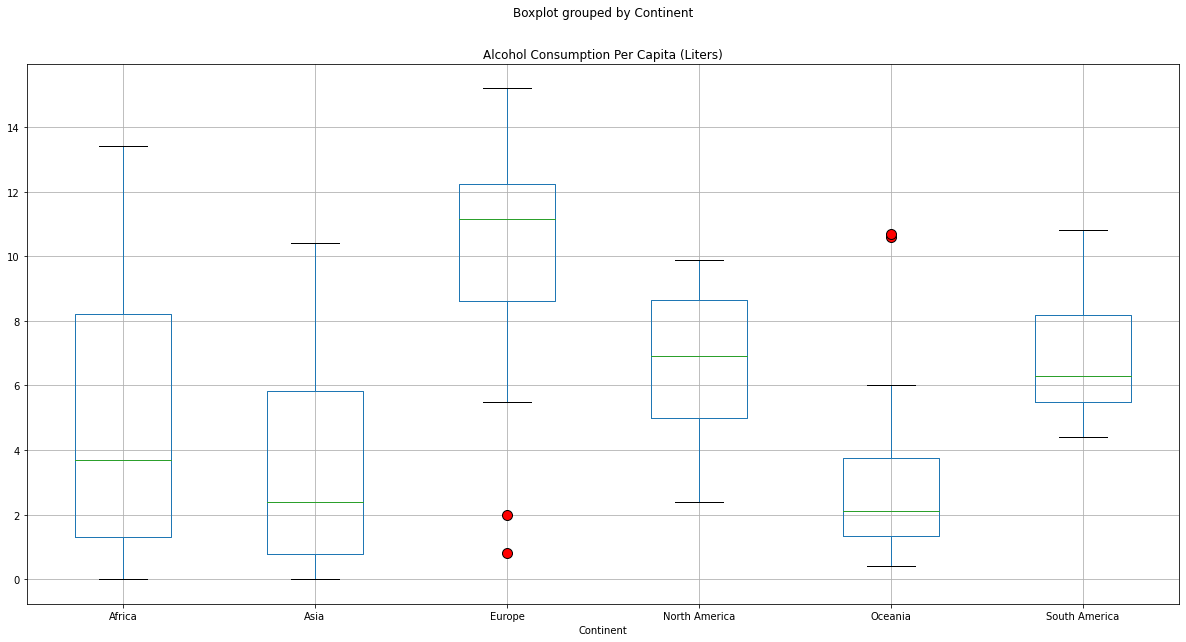

In [5]:
updated_df.boxplot("Alcohol Consumption Per Capita (Liters)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/alcohol_consumption_per_continent_boxplot_markers.png")

In [6]:
group1 = updated_df[updated_df["Continent"] == "Africa"]["Alcohol Consumption Per Capita (Liters)"]
group2 = updated_df[updated_df["Continent"] == "Asia"]["Alcohol Consumption Per Capita (Liters)"]
group3 = updated_df[updated_df["Continent"] == "Europe"]["Alcohol Consumption Per Capita (Liters)"]
group4 = updated_df[updated_df["Continent"] == "North America"]["Alcohol Consumption Per Capita (Liters)"]
group5 = updated_df[updated_df["Continent"] == "Oceania"]["Alcohol Consumption Per Capita (Liters)"]
group6 = updated_df[updated_df["Continent"] == "South America"]["Alcohol Consumption Per Capita (Liters)"]

In [7]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=39.0908735441233, pvalue=5.946781924844183e-19)

In [8]:
stats.ttest_ind(group3, group5)

Ttest_indResult(statistic=6.739906169357296, pvalue=9.301922597184508e-09)

Africa's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Asia's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Europe's potential outliers: 6      0.8
169    2.0
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
North America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Oceania's potential outliers: 8      10.6
120    10.7
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
South America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)


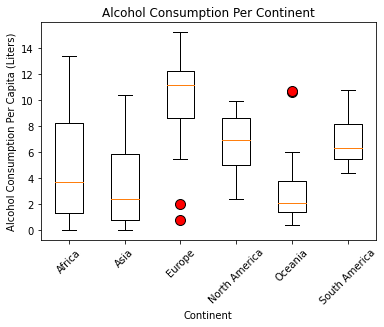

In [37]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]

# Create empty list to fill with tumor vol data (for plotting)
alcohol_consumption_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for continent in continents:
      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    alcohol_by_continent=updated_df.loc[updated_df["Continent"]==continent, "Alcohol Consumption Per Capita (Liters)"]
    
    # add subset 
    alcohol_consumption_data.append(alcohol_by_continent)

    quartiles = alcohol_by_continent.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    iqr=upper_q-lower_q
    lower_bound=lower_q - (1.5*iqr)
    upper_bound=upper_q + (1.5*iqr)
    outliers=alcohol_by_continent.loc[(alcohol_by_continent<lower_bound)|(alcohol_by_continent>upper_bound)]
    print(f"{continent}'s potential outliers: {outliers}")
    
rate=dict(markerfacecolor='red', markersize=10)
plt.boxplot(alcohol_consumption_data, labels=continents, flierprops=rate)
plt.ylabel('Alcohol Consumption Per Capita (Liters)')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.title('Alcohol Consumption Per Continent')
plt.show()

In [10]:
#Number of values per continent
updated_df_countries_by_continent=updated_df["Continent"].value_counts()
updated_df_countries_by_continent

Africa           53
Europe           46
Asia             40
North America    23
Oceania          12
South America    12
Name: Continent, dtype: int64

In [11]:
#Total liters drunk by continent
alcohol_by_continent_sum=updated_df.groupby("Continent")["Alcohol Consumption Per Capita (Liters)"].sum()
alcohol_by_continent_sum

Continent
Africa           252.7
Asia             137.6
Europe           473.4
North America    157.3
Oceania           42.5
South America     83.2
Name: Alcohol Consumption Per Capita (Liters), dtype: float64

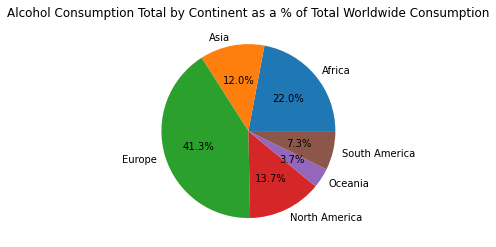

In [12]:
#Pie chart displaying total liters of alcohol drunk by continent
plt.pie(alcohol_by_continent_sum, labels=continents, autopct='%1.1f%%')
plt.title("Alcohol Consumption Total by Continent as a % of Total Worldwide Consumption");
plt.savefig("output_data/alcohol_consumption_total_by_continent_as_a_%_of_total_worldwide_consumption_pie_chart.png")

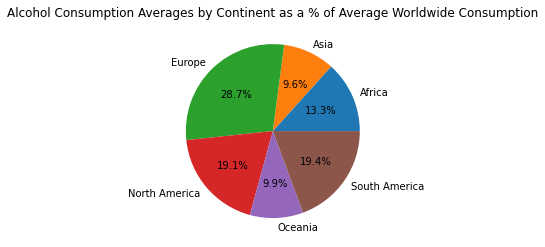

In [13]:
#Pie chart displaying average liters of alcohol drunk by continent
alcohol_by_continent_mean=updated_df.groupby("Continent")["Alcohol Consumption Per Capita (Liters)"].mean()
plt.pie(alcohol_by_continent_mean, labels=continents, autopct='%1.1f%%')
plt.title("Alcohol Consumption Averages by Continent as a % of Average Worldwide Consumption");
plt.savefig("output_data/alcohol_consumption_averages_by_continent_as_a_%_of_average_worldwide_consumption_pie_chart.png")

In [14]:
#Statistical analysis of alcohol consumption by continent
agg_alcohol_df=updated_df.groupby("Continent")["Alcohol Consumption Per Capita (Liters)"].agg(['mean','median', 'var', 'std', 'sem'])
agg_alcohol_df

,mean,median,var,std,sem
Continent,,,,,
Africa,4.767925,3.70,14.059913,3.749655,0.515055
Asia,3.440000,2.40,9.578872,3.094975,0.489359
Europe,10.291304,11.15,8.688367,2.947604,0.434600
North America,6.839130,6.90,4.957036,2.226440,0.464245
Oceania,3.541667,2.10,13.048106,3.612216,1.042757
South America,6.933333,6.30,4.344242,2.084285,0.601681


## Adding Wine Data

In [15]:
#Getting the latest timepoint for wine consumption data and merging it with the wine dataframe
wine_latest_timepoint_per_country=wine_consumption_df.groupby("Entity")[["Year"]].max()
merged_updated_timepoint_wine_df = wine_latest_timepoint_per_country.merge(wine_consumption_df, on = ["Entity", "Year"], how="left")
merged_updated_timepoint_wine_df.head()

,Entity,Year,Code,Wine Consumption per capita (Liters)
0,Afghanistan,2013,AFG,0.00
1,Albania,2014,ALB,1.14
2,Algeria,2013,DZA,0.22
3,Andorra,2013,AND,4.29
4,Angola,2014,AGO,1.32


In [16]:
#Getting the average for wine consumption data from 1960 to 2014
wine_average_consumption_per_country=wine_consumption_df.groupby("Entity")[["Wine Consumption per capita (Liters)"]].mean()
wine_average_consumption_per_country.sample(5)

,Wine Consumption per capita (Liters)
Entity,
Chad,0.072264
Sudan,0.001373
Bangladesh,0.000000
Ghana,0.033333
Mauritania,0.021373


In [17]:
#Merging the average for wine consumption data from 1960 to 2014 into the wine dataframe
merged_updated_timepoint_average_wine_df = merged_updated_timepoint_wine_df.merge(wine_average_consumption_per_country, on = ["Entity"], how="left")
merged_updated_timepoint_average_wine_df=merged_updated_timepoint_average_wine_df.rename(columns={"Wine Consumption per capita (Liters)_x":"Wine Consumption at Latest Timepoint(L)", "Wine Consumption per capita (Liters)_y":"Wine Consumption Average Over The Years(L)", "Year":"Latest Year for Wine Consumption Data"})
merged_updated_timepoint_average_wine_df.sample(5)

,Entity,Latest Year for Wine Consumption Data,Code,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
125,North Korea,2013,PRK,0.00,0.000000
181,Uruguay,2014,URY,3.13,4.128889
46,Democratic Republic of Congo,2011,COD,0.22,0.026667
18,Benin,2011,BEN,0.22,0.147843
136,Portugal,2014,PRT,5.99,10.900556


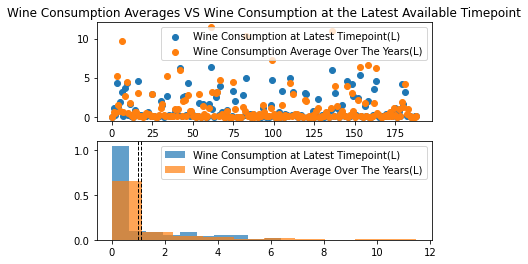

In [18]:
# Scatter Plot to show the potential diffirence or similarity between average wine consumption from 1960 to 2014
# and wine consumption at the latest available timepoint
last_timepoint_wine=merged_updated_timepoint_average_wine_df["Wine Consumption at Latest Timepoint(L)"]
average_wine=merged_updated_timepoint_average_wine_df["Wine Consumption Average Over The Years(L)"]
    
plt.subplot(2,1,1)
plt.title("Wine Consumption Averages VS Wine Consumption at the Latest Available Timepoint")
plt.scatter(range(len(last_timepoint_wine)), last_timepoint_wine, label="Wine Consumption at Latest Timepoint(L)")
plt.scatter(range(len(average_wine)), average_wine, label="Wine Consumption Average Over The Years(L)")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(last_timepoint_wine, 10, density=True, alpha=0.7, label="Wine Consumption at Latest Timepoint(L)")
plt.hist(average_wine, 10, density=True, alpha=0.7, label="Wine Consumption Average Over The Years(L)")
plt.axvline(last_timepoint_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(average_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend(); 
plt.savefig("output_data/wine_consumption_averages_vs_wine_consumption_at_latest_timepoint_scatterplot.png")

In [19]:
#Checking how different is data (average over teh years vs at the last timepoint)
stats.ttest_ind(last_timepoint_wine, average_wine, equal_var=False)

Ttest_indResult(statistic=-0.6190622697626872, pvalue=0.5362811196901257)

In [20]:
#Seeing that it is not significantly different, we decided to only use the wine consumption data at the last timepoint
merged_with_wine_df = updated_df.merge(merged_updated_timepoint_average_wine_df, left_on="Country", right_on="Entity", how="inner")
merged_with_wine_df = merged_with_wine_df.drop(['Code', 'Entity', 'Latest Year for Wine Consumption Data', 'Wine Consumption Average Over The Years(L)'], axis=1)
len(merged_with_wine_df)

186

In [21]:
#Renaming the column containing wine data
merged_with_wine_df=merged_with_wine_df.rename(columns={"Wine Consumption at Latest Timepoint(L)":"Wine Consumption per capita (Liters)"})
merged_with_wine_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,South Asia,2.5669,52.590000,7.462861,17.553463,0.00
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1.14
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,0.22
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",NaN,NaN,NaN,NaN,14.726869,4.29
4,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,NaN,NaN,NaN,NaN,12.498281,1.32


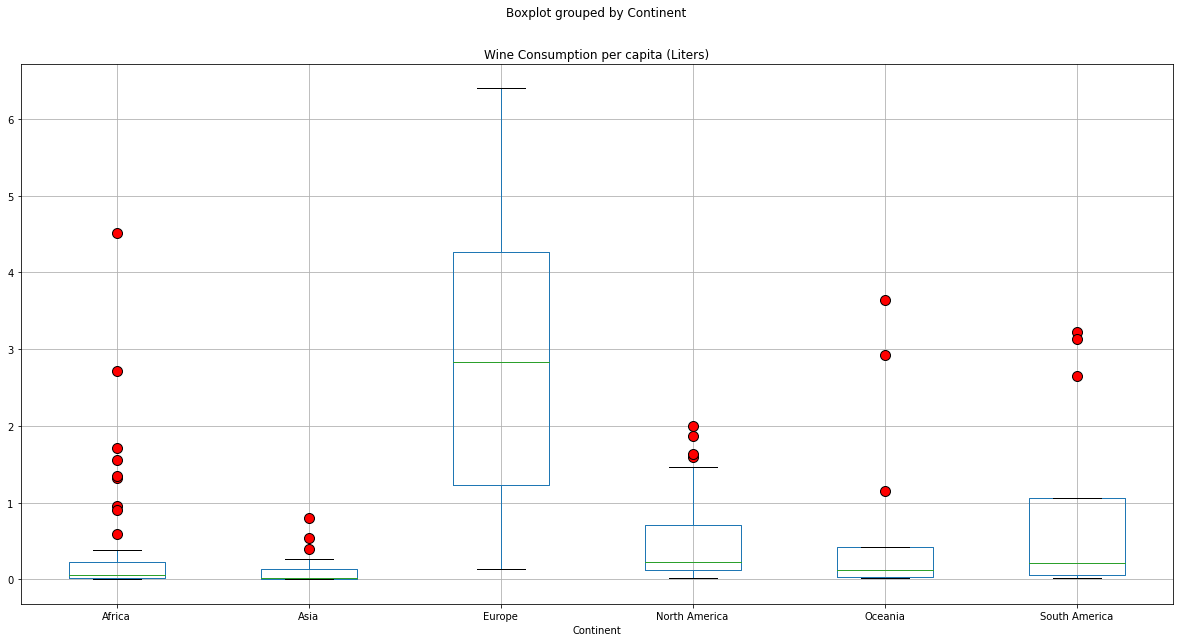

In [22]:
#Boxlot to display wineconsumption per continent
merged_with_wine_df.boxplot("Wine Consumption per capita (Liters)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/wine_consumption_per_capita_by_continent_boxplot.png")

In [23]:
#Total liters of wine drunk by continent
wine_by_continent_sum=merged_with_wine_df.groupby("Continent")["Wine Consumption per capita (Liters)"].sum()
wine_by_continent_sum

Continent
Africa            19.33
Asia               3.77
Europe           128.76
North America     12.95
Oceania            8.47
South America     10.62
Name: Wine Consumption per capita (Liters), dtype: float64

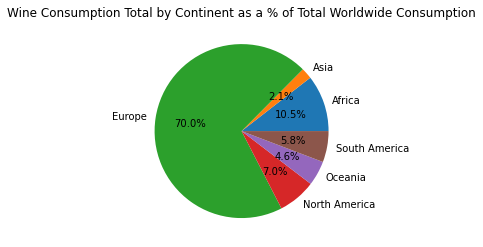

In [24]:
#Pie chart showing % of total liters of wine drunk by continent
plt.pie(wine_by_continent_sum, labels=continents, autopct='%1.1f%%')
plt.title("Wine Consumption Total by Continent as a % of Total Worldwide Consumption");
plt.savefig("output_data/wine_consumption_total_by_continent_as_a_%_of_total_worldwide_consumption_pie_chart.png")

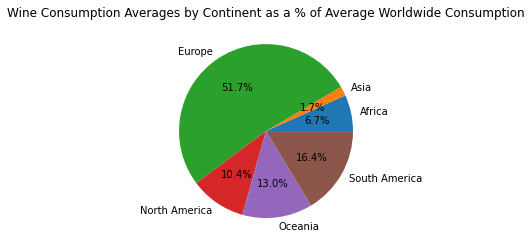

In [25]:
#Average liters of wine drunk by continent and a pie chart
wine_by_continent_mean=merged_with_wine_df.groupby("Continent")["Wine Consumption per capita (Liters)"].mean()
plt.pie(wine_by_continent_mean, labels=continents, autopct='%1.1f%%')
plt.title("Wine Consumption Averages by Continent as a % of Average Worldwide Consumption");
plt.savefig("output_data/wine_consumption_averages_by_continent_as_a_%_of_total_worldwide_consumption_pie_chart.png")

In [26]:
#Percentage of wine out of total alcohol drank per continent
grouped_continent_wine_percentage=wine_by_continent_sum.values/alcohol_by_continent_sum.values*100
grouped_continent_wine_percentage

array([ 7.64938662,  2.73982558, 27.19898606,  8.23267641, 19.92941176,
       12.76442308])

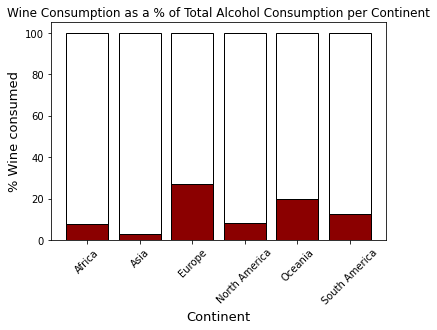

In [27]:
plt.bar(continents, [100 for i,_ in enumerate(continents)], edgecolor='black', fill=False)
plt.bar(continents, grouped_continent_wine_percentage, edgecolor='black', fill=True, color='darkred')
plt.ylabel('% Wine consumed', fontsize=13)
plt.xlabel('Continent', fontsize=13)
plt.title("Wine Consumption as a % of Total Alcohol Consumption per Continent")
plt.xticks(rotation=45);
plt.savefig("output_data/wine_consumption as_%_of_total_alcohol_consumption_per_continent_bar_graph.png")

In [28]:
#Output CSV for merged data
merged_with_wine_df.to_csv("output_data/merged_with_wine_df.csv")

## Cleaning Data for Further Correlations Between Alcohol Consumption and GDP, Life Expectancy, Happiness Score and Mental Health

In [29]:
#Dropping NaN values from the dataframe to calculate further correlations
gdp_and_life_expectancy_df=merged_with_wine_df.dropna(subset=['GDP per capita', 'Life Expectancy'])
len(gdp_and_life_expectancy_df)

141

In [30]:
#Dispalying number of datapoints per each continent in this dataframe
gdp_and_life_expectancy_df_countries_by_continent=gdp_and_life_expectancy_df["Continent"].value_counts()
gdp_and_life_expectancy_df_countries_by_continent

Europe           43
Africa           39
Asia             34
North America    13
South America    10
Oceania           2
Name: Continent, dtype: int64

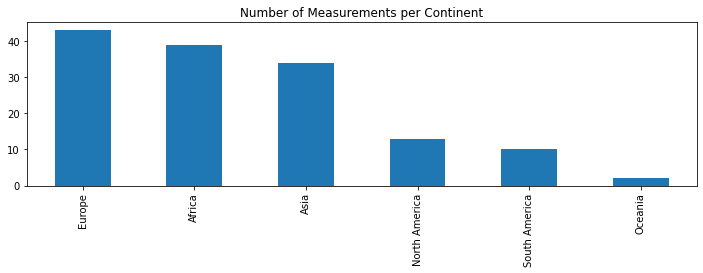

In [31]:
#Visual for the number of datapoints in each continent
gdp_and_life_expectancy_df_countries_by_continent.plot(kind='bar', figsize=(12,3), title ='Number of Measurements per Continent');
plt.savefig("output_data/number_of_measurement_per_continent_after_dropping_nans_bar_graph.png")

In [32]:
#Statistical analysis of data in the final dataframe
gdp_and_life_expectancy_df.describe()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,6.480142,5.497109,64.637501,9.309033,13.068401,1.085816
std,4.112111,1.112771,6.814233,1.192886,1.892776,1.633237
min,0.000000,2.566900,45.200001,6.492642,10.067097,0.000000
25%,2.800000,4.729300,59.599152,8.350645,11.630930,0.020000
50%,6.600000,5.541500,66.404343,9.500369,12.526669,0.170000
75%,9.800000,6.228500,69.002548,10.263742,14.536026,1.670000
max,15.200000,7.808700,76.804581,11.450681,18.495605,6.400000


## Looking at correlations between Alcohol Consumption overall and Wine Consumption specifically and GDP, Life Expectancy, Happiness Score and Mental Health per Continent

In [33]:
#Define function to build linear regressionon alcohol consumption
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Alcohol Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [34]:
#Define a function for linear regressions on wine data
def plot_wine_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Wine Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [35]:
#Average Happiness Score by Continent
happiness_score_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Happiness Score"]].mean()
happiness_score_mean

,Happiness Score
Continent,
Africa,4.441672
Asia,5.282953
Europe,6.231049
North America,6.184008
Oceania,7.261200
South America,5.939710


The r-value is: 0.18116385485317182


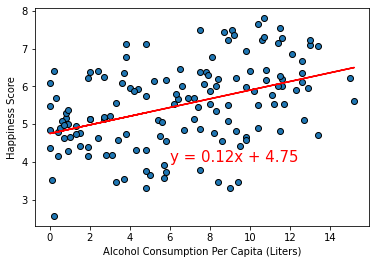

The r-value is: 0.2851871094230983


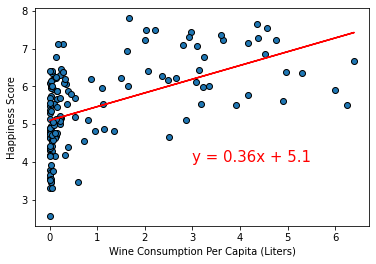

In [38]:
#Plot linear regression between the Happiness Score and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Happiness Score']
plot_linear_regression(x_values,y_values,'Happiness Score',(6,4))
x_values=gdp_and_life_expectancy_df['Wine Consumption per capita (Liters)']
y_values=gdp_and_life_expectancy_df['Happiness Score']
plot_wine_linear_regression(x_values,y_values,'Happiness Score',(3,4))

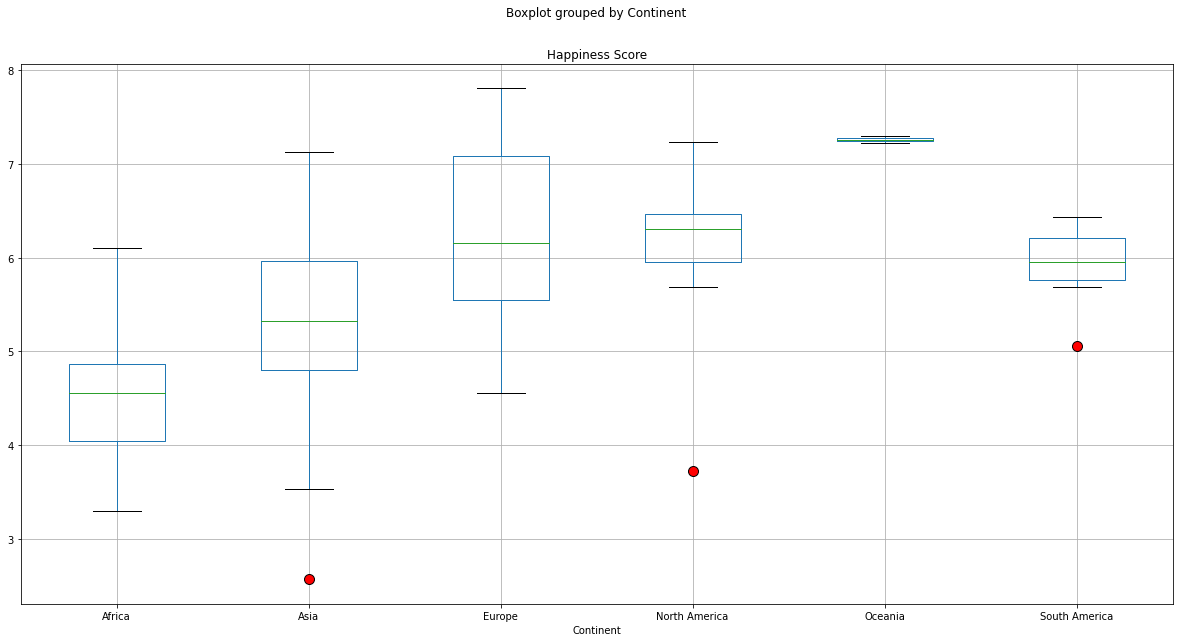

In [39]:
#Boxplot of Happiness Score by Continent
gdp_and_life_expectancy_df.boxplot("Happiness Score", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/happiness_score_by_continent_boxplot.png")

In [40]:
#Average Life Expectancy by Continent
life_expectancy_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Life Expectancy"]].mean()
life_expectancy_by_continent_mean

,Life Expectancy
Continent,
Africa,56.636795
Asia,65.107686
Europe,69.805096
North America,66.825558
Oceania,73.403584
South America,67.423274


The r-value is: 0.15718368589991474


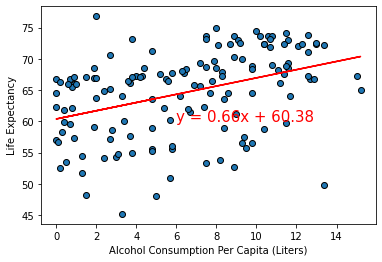

The r-value is: 0.3126332597510382


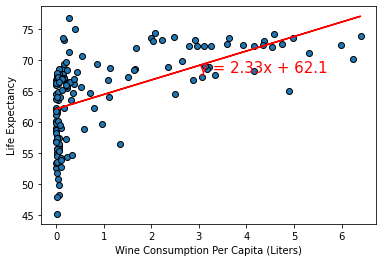

In [42]:
#Plot linear regression between the Life Expectancy and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,60))
x_values=gdp_and_life_expectancy_df['Wine Consumption per capita (Liters)']
y_values=gdp_and_life_expectancy_df['Life Expectancy']
plot_wine_linear_regression(x_values,y_values,'Life Expectancy',(3,68))

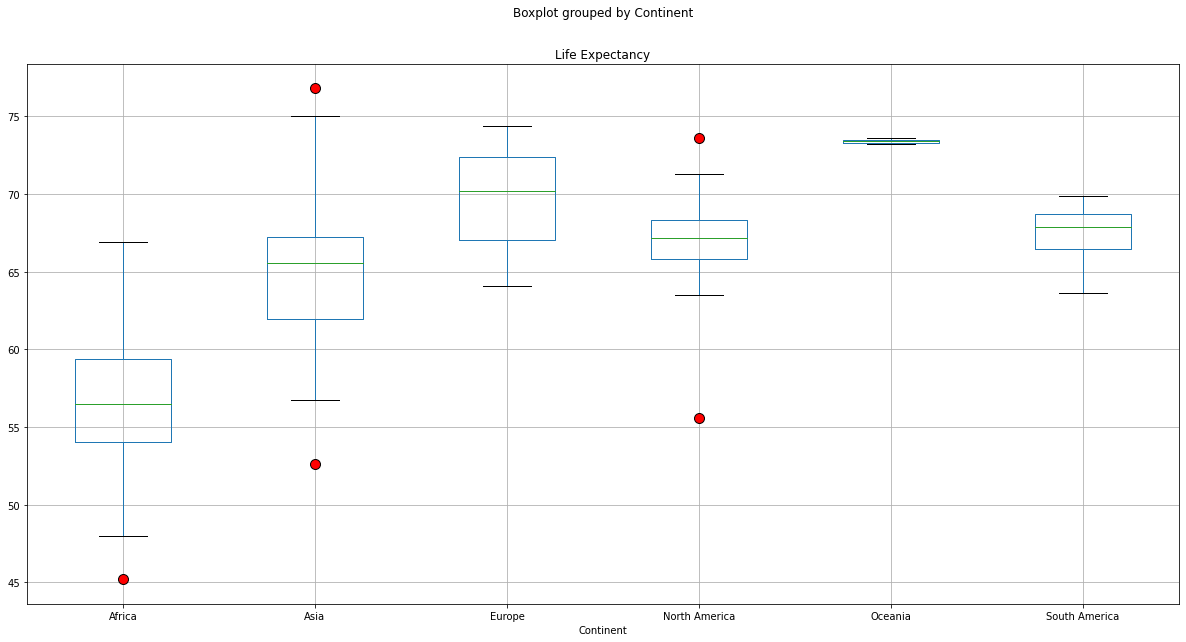

In [43]:
#Boxplot of Life Expectancy by Continent
gdp_and_life_expectancy_df.boxplot("Life Expectancy", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/life_expectancy_by_continent_boxplot.png")

In [44]:
#Average GDP by Continent
gdp_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["GDP per capita"]].mean()
gdp_by_continent_mean

,GDP per capita
Continent,
Africa,8.079819
Asia,9.376013
Europe,10.243561
North America,9.400182
Oceania,10.610770
South America,9.477927


The r-value is: 0.20507265852518977


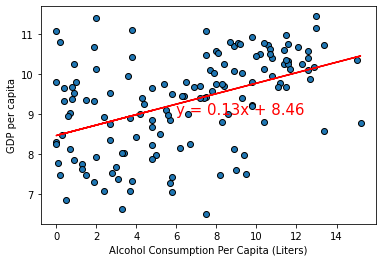

The r-value is: 0.30128299239517886


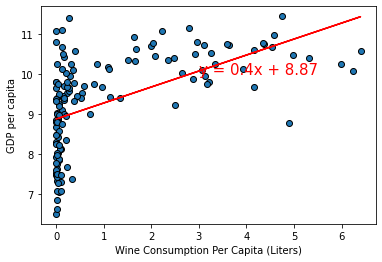

In [45]:
#Plot linear regression between the GDP per capita and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,9))
x_values=gdp_and_life_expectancy_df['Wine Consumption per capita (Liters)']
y_values=gdp_and_life_expectancy_df['GDP per capita']
plot_wine_linear_regression(x_values,y_values,'GDP per capita',(3,10))

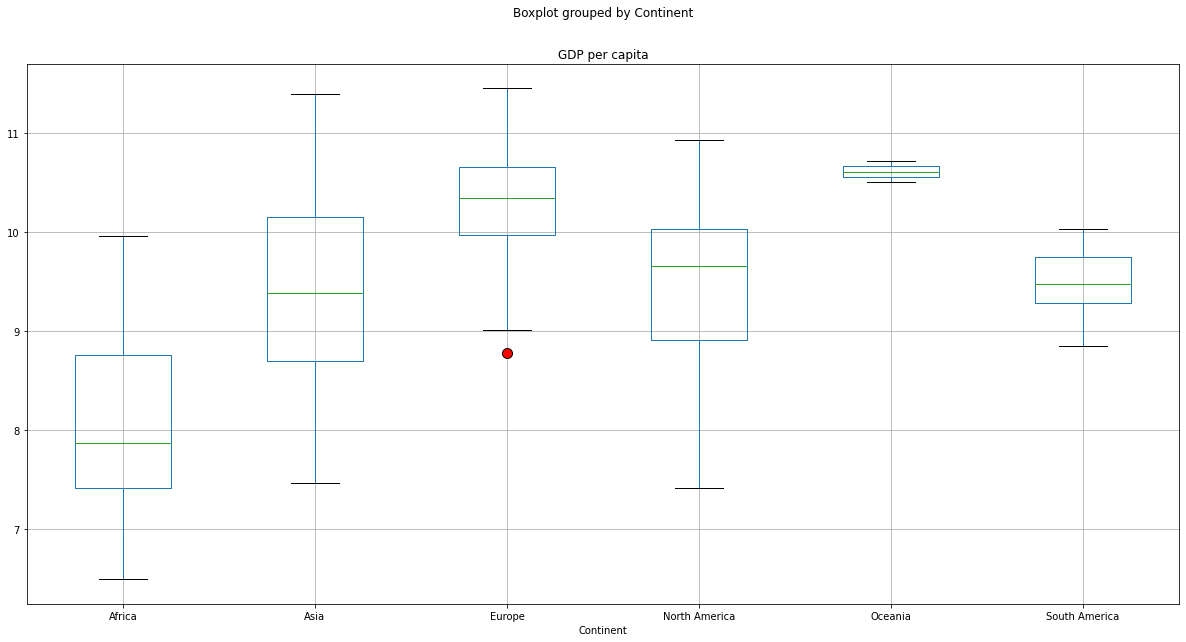

In [46]:
#Boxplot of GDP by Continent
gdp_and_life_expectancy_df.boxplot("GDP per capita", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/gdp_by_continent.png")

In [47]:
#Average mental health disorders by Continent
mental_health_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Mental Health Disorders (%)"]].mean()
mental_health_by_continent_mean

,Mental Health Disorders (%)
Continent,
Africa,12.644170
Asia,13.062704
Europe,13.324556
North America,12.461781
Oceania,18.286749
South America,13.385746


The r-value is: 0.007723890876234616


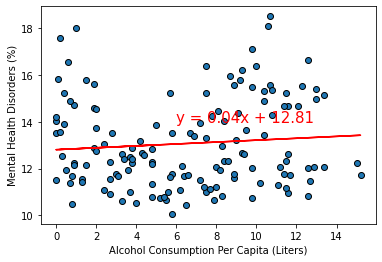

The r-value is: 0.12882184480833359


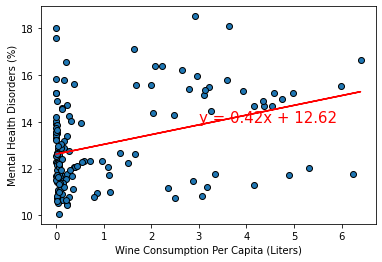

In [48]:
#Plot linear regression between the Mental Health Disorders and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Mental Health Disorders (%)']
plot_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(6,14))
x_values=gdp_and_life_expectancy_df['Wine Consumption per capita (Liters)']
y_values=gdp_and_life_expectancy_df['Mental Health Disorders (%)']
plot_wine_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(3,14))

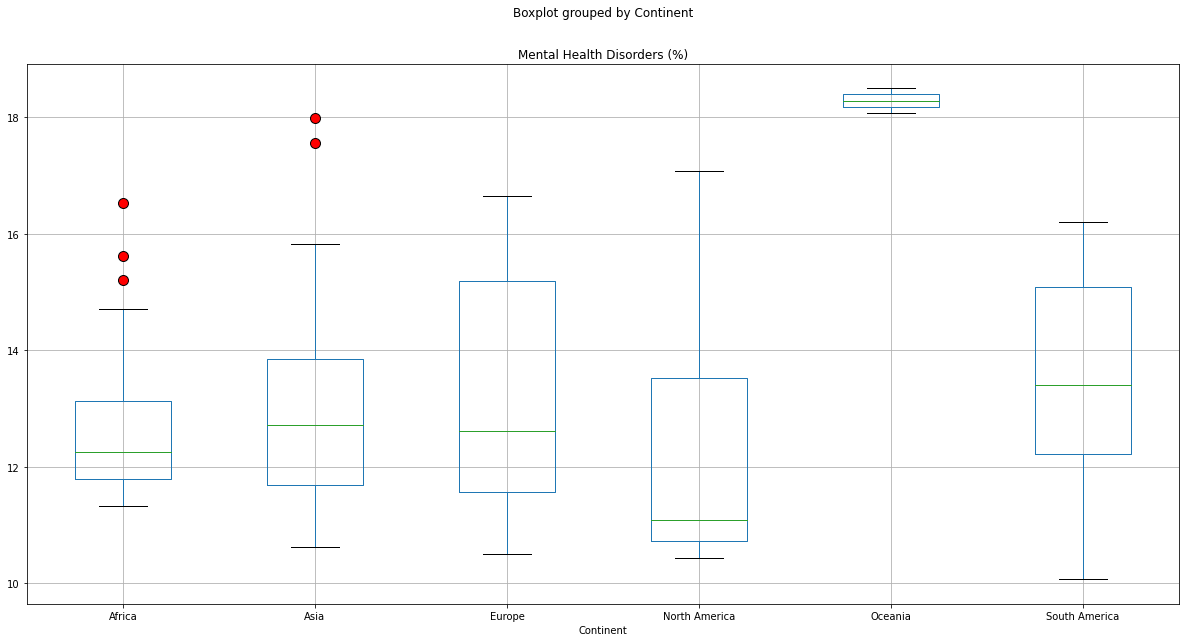

In [49]:
#Boxplot of mental health disorders by Continent
gdp_and_life_expectancy_df.boxplot("Mental Health Disorders (%)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/mental_health_by_continent_boxplot.png")

## Looking at correlations between Wine Consumption and GDP, Life Expectancy, Happiness Score and Mental Health in Europe

In [50]:
#Separating Europe data into another dataframe
only_europe_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Continent"]=="Europe")]
only_europe_data.sample(5)

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
105,Europe,MLT,Malta,8.1,"Mediterranean; mild, rainy winters; hot, dry s...",Western Europe,6.7728,72.199997,10.533838,14.472899,3.25
160,Europe,SWE,Sweden,9.2,"temperate in south with cold, cloudy winters a...",Western Europe,7.3535,72.600769,10.758794,15.777617,3.60
161,Europe,CHE,Switzerland,11.5,"temperate, but varies with altitude; cold, clo...",Western Europe,7.5599,74.102448,10.979933,15.221312,4.57
55,Europe,EST,Estonia,11.6,"maritime; wet, moderate winters, cool summers",Central and Eastern Europe,6.0218,68.604958,10.340017,12.616894,1.65
18,Europe,BIH,Bosnia and Herzegovina,6.4,hot summers and cold winters; areas of high el...,Central and Eastern Europe,5.6741,67.808136,9.455817,11.694528,0.15


In [51]:
#Statistical analysis on Europe only data
only_europe_data.describe()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,10.223256,6.231049,69.805096,10.243561,13.324556,2.828140
std,2.960360,0.904860,3.198465,0.591456,1.994888,1.787353
min,0.800000,4.560700,64.100456,8.776714,10.495815,0.130000
25%,8.650000,5.546050,67.055027,9.970097,11.573121,1.320000
50%,11.100000,6.159000,70.214905,10.340017,12.616894,2.870000
75%,12.200000,7.084750,72.403881,10.656453,15.182889,4.260000
max,15.200000,7.808700,74.402710,11.450681,16.640201,6.400000


# Overall Alcohol Consumption VS Wine Consumption Correlation with Happiness Score in Europe

The r-value is: 0.09271745557343575


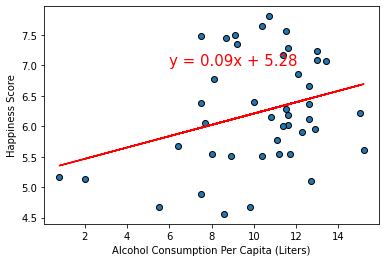

The r-value is: 0.14178448062606994


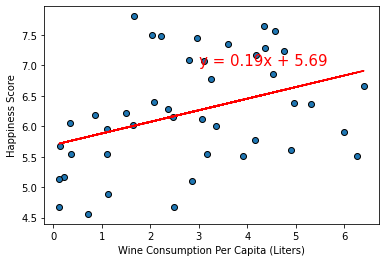

In [52]:
#Side by side correlation for Happiness Score and Alcohol in general and Wine Specifically in Europe only
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['Happiness Score']
plot_linear_regression(x_values,y_values,'Happiness Score',(6,7))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['Happiness Score']
plot_wine_linear_regression(x_values,y_values,'Happiness Score',(3,7))

# Overall Alcohol Consumption VS Wine Consumption Correlation with Life Expectancy in Europe

The r-value is: 0.025914227061375562


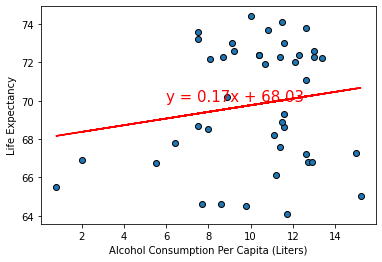

The r-value is: 0.31563005361696045


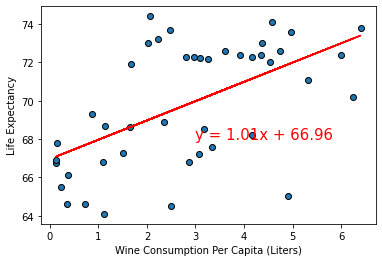

In [53]:
#Side by side correlation for Life Expectancy and Alcohol in general and Wine Specifically in Europe only
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,70))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['Life Expectancy']
plot_wine_linear_regression(x_values,y_values,'Life Expectancy',(3,68))

# Overall Alcohol Consumption VS Wine Consumption Correlation with GDP in Europe

The r-value is: 0.06067221924242679


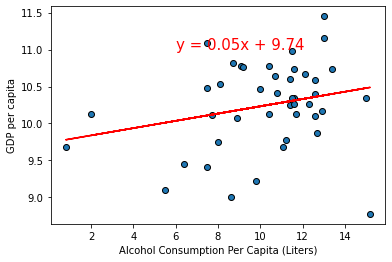

The r-value is: 0.12392540422792007


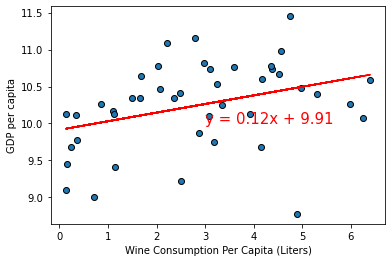

In [54]:
#Side by side correlation for GDP and Alcohol in general and Wine Specifically in Europe only
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,11))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['GDP per capita']
plot_wine_linear_regression(x_values,y_values,'GDP per capita',(3,10))

# Overall Alcohol Consumption VS Wine Consumption Correlation with Mental Health in Europe

The r-value is: 0.012448810381493602


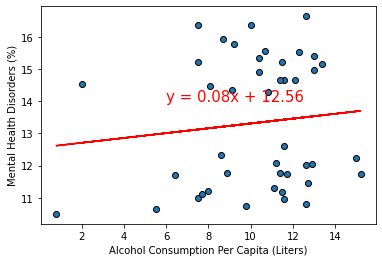

The r-value is: 0.1744547100342905


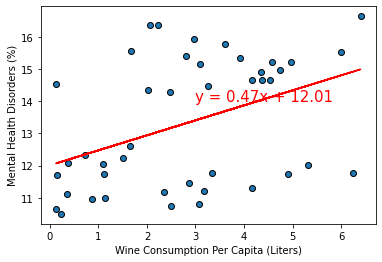

In [55]:
#Side by side correlation for Mental Health Disorders and Alcohol in general and Wine Specifically in Europe only
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['Mental Health Disorders (%)']
plot_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(6,14))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['Mental Health Disorders (%)']
plot_wine_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(3,14))

# Potential Causation between high GDP and high Alcohol Consumption

In [56]:
#Creating bins for different GDP rates
bins = [0, 7, 8, 9, 10, 11, 12]
group_labels = ["GDP up to 7", "GDP up to 8", "GDP up to 9", "GDP up to 10", "GDP up to 11", "GDP up to 12"]
pd.cut(gdp_and_life_expectancy_df["GDP per capita"], bins, labels=group_labels).head()

0     GDP up to 8
1    GDP up to 10
2    GDP up to 10
6    GDP up to 10
7    GDP up to 10
Name: GDP per capita, dtype: category
Categories (6, object): [GDP up to 7 < GDP up to 8 < GDP up to 9 < GDP up to 10 < GDP up to 11 < GDP up to 12]

In [57]:
#Adding a column with GDP group names to the original datagrame
gdp_and_life_expectancy_df["GDP Group"] = pd.cut(gdp_and_life_expectancy_df["GDP per capita"], bins, labels=group_labels)
gdp_and_life_expectancy_df.sample(5)

<ipython-input-57-24fe85567b8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_life_expectancy_df["GDP Group"] = pd.cut(gdp_and_life_expectancy_df["GDP per capita"], bins, labels=group_labels)


,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters),GDP Group
177,Africa,TZA,Tanzania,9.4,varies from tropical along coast to temperate ...,Sub-Saharan Africa,3.4762,57.496075,7.967665,12.637257,0.02,GDP up to 8
89,Asia,KOR,South Korea,10.2,NaN,East Asia,5.8724,73.602730,10.510567,11.396378,0.15,GDP up to 11
112,Africa,MAR,Morocco,0.6,"Mediterranean, becoming more extreme in the in...",Middle East and North Africa,5.0948,65.896240,8.940313,16.528526,0.21,GDP up to 9
79,Europe,IRL,Ireland,13.0,temperate maritime; modified by North Atlantic...,Western Europe,7.0937,72.300789,11.160978,15.414129,2.80,GDP up to 12
118,Europe,NLD,Netherlands,8.7,temperate; marine; cool summers and mild winters,Western Europe,7.4489,72.300919,10.812712,15.942346,2.97,GDP up to 11


In [58]:
#Counting the number of values that fall into each GDP group
gdp_and_life_expectancy_df_gdp_groups=gdp_and_life_expectancy_df["GDP Group"].value_counts()
gdp_and_life_expectancy_df_gdp_groups

GDP up to 11    42
GDP up to 10    41
GDP up to 9     26
GDP up to 8     23
GDP up to 12     6
GDP up to 7      3
Name: GDP Group, dtype: int64

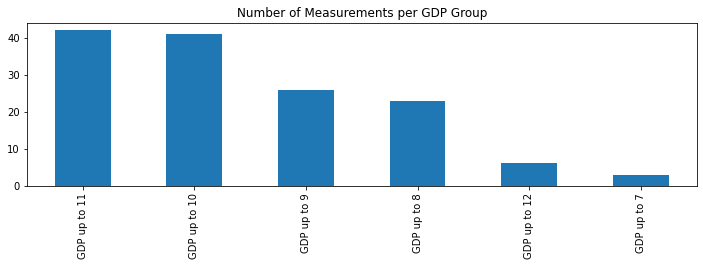

In [59]:
#Visual for number of values in each GDP group
gdp_and_life_expectancy_df_gdp_groups.plot(kind='bar', figsize=(12,3), title ='Number of Measurements per GDP Group');
plt.savefig("output_data/number_of_measurements_per_gdp_bin_bar_graph.png")

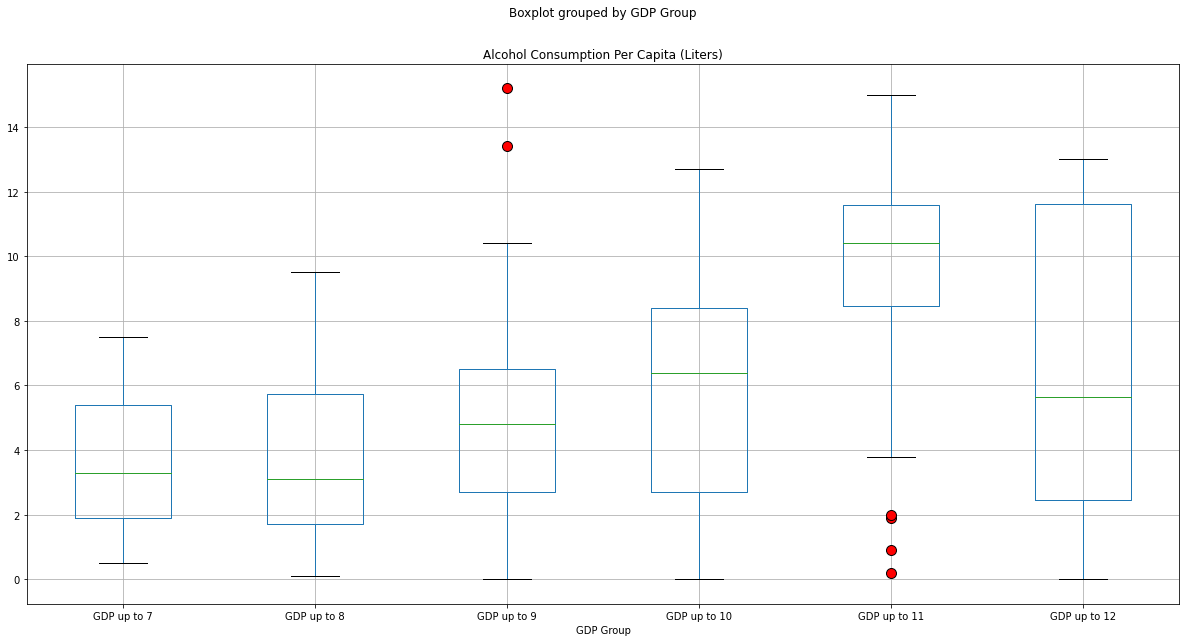

In [60]:
#Boxplot to show alcohol consumption in varios GDP groups
gdp_and_life_expectancy_df.boxplot("Alcohol Consumption Per Capita (Liters)", by="GDP Group", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/alcohol_consumption_by_gdp_group_worldwide_boxplot.png")

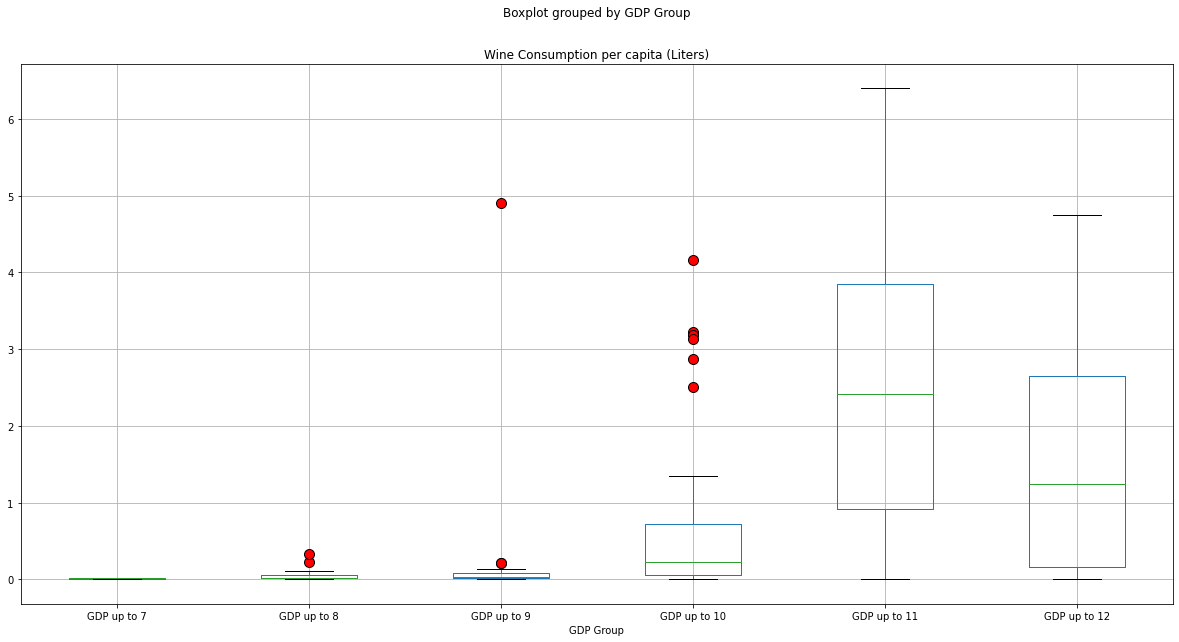

In [61]:
#Boxplot to show wine consumption in varios GDP groups
gdp_and_life_expectancy_df.boxplot("Wine Consumption per capita (Liters)", by="GDP Group", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10));
plt.savefig("output_data/wine_consumption_by_gdp_group_worldwide_boxplot.png")

The r-value is: 0.7242337326090015


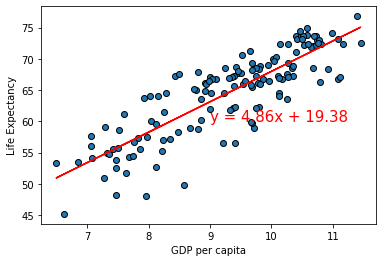

In [64]:
#Correlation between GDP and life expectancy
x_values=gdp_and_life_expectancy_df['GDP per capita']
y_values=gdp_and_life_expectancy_df['Life Expectancy']
plot_gdp_linear_regression(x_values,y_values,'Life Expectancy',(9,60))

In [65]:
gdp_and_life_expectancy_df.to_csv("output_data/gdp_and_life_expectancy_df.csv")